## Input Image

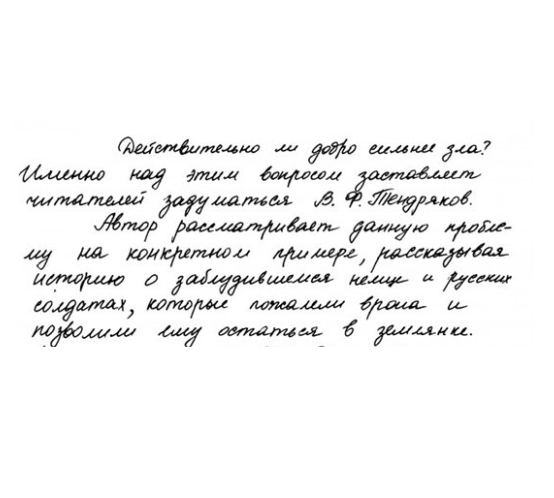

In [1]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/konverner/shiftlab_ocr/main/demo_image.png',
   'test.png')

img = Image.open('test.png')
img

In [5]:
from doc2text.reader import Reader

reader = Reader()
result = reader.doc2text("demo_image.png")
print(result[0])

recognizer weights has loaded from c:\shiftlab_easy_ocr\doc2text\weights/ocr_transformer_4h2l_simple_conv_64x256.pt
Действительно ли добро сильни зла Именно над этим вопросом заставляет читателей задуматься В. Тендряков. Автор рассматривает данную пробле- му на конкретном примере рассказывая историю заблудившемся немце русских солдатах, которые пожалели врала и позволи ему остаться землянке. 


In [2]:
import easyocr

reader = easyocr.Reader(
            ['ru'],
            gpu=True,
            model_storage_directory='C:/shiftlab_easy_ocr/doc2text/weights/easyOCR/model',
            user_network_directory='C:/shiftlab_easy_ocr/doc2text/weights/easyOCR/user_network',
            download_enabled=False,
            recog_network='ru_custom'
        )
result = reader.readtext("demo_image.png")

print(' '.join([word[1] for word in result]))

'Действительно ни сильни зна Иленно над этим вокросом}заставлмт читатемй}задуматься В- Теюдраков- расматривает}данную пробле му на конкретном примеря рассказывая историю заблудившеися немц руеских \солдатах+ которые пожалели брона и позволим лму остаться землни добро Автор


In [8]:
from metric.metric import cosine_similarity, cer

cosine_similarity("Действительно ли добро сильнее зла? Именно над этим вопросом заставляет читателя задуматься В.Ф. Тендряков. Автор рассматривает данную проблему на конкретном примере, рассказывая историю о заблудившемся немце и русских солдатах, которые пожалели врага и позволили ему остаться в землянке.",
                  "Действительно ли добро сильни зла Именно над этим вопросом заставляет читателей задуматься В. Тендряков. Автор рассматривает данную пробле- му на конкретном примере рассказывая историю заблудившемся немце русских солдатах, которые пожалели врала и позволи ему остаться землянке.")

0.7378647873726218

## Result: text and crops

In [2]:
print(result[0])

Действительно ли добро сильни зла Именно над этим вопросом заставляет читателей задуматься В. Тендряков. Автор рассматривает данную пробле- му на конкретном примере рассказывая историю заблудившемся немце русских солдатах, которые пожалели врала и позволи ему остаться землянке. 


IndexError: list index out of range

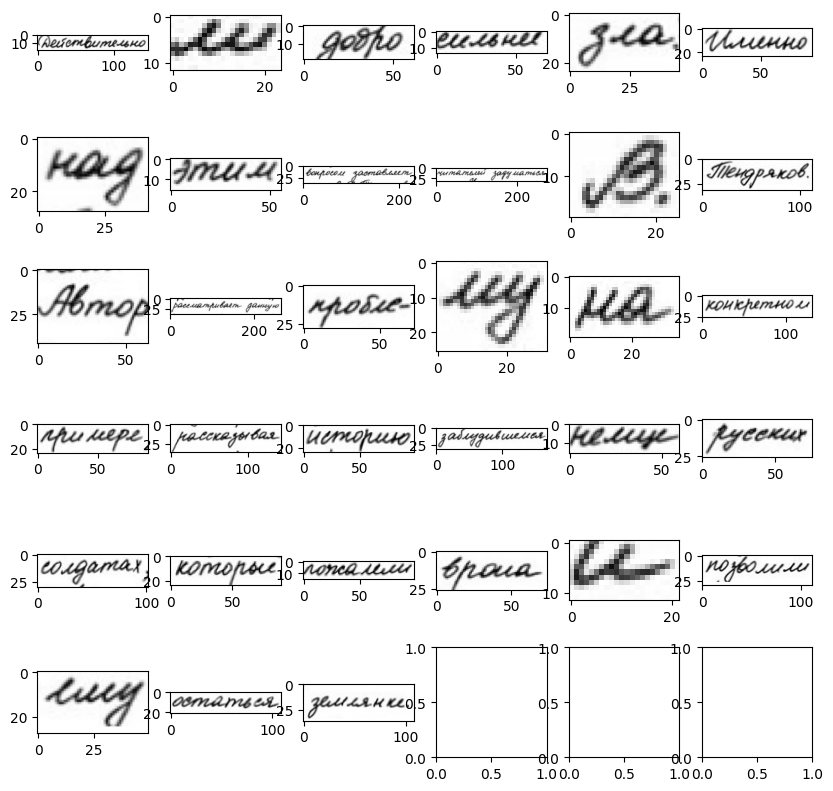

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N**(0.5))
k = 0
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        axarr[i,j].imshow(images[k].img)
        k += 1
f.show()

tatneft test

In [23]:
import os
import numpy as np
import easyocr
from doc2text.reader import Reader
from metric.metric import cosine_similarity, cer

def_reader = easyocr.Reader(['ru'])
old_reader = easyocr.Reader(
            ['ru'],
            gpu=True,
            model_storage_directory='C:/shiftlab_easy_ocr/doc2text/weights/easyOCR/model',
            user_network_directory='C:/shiftlab_easy_ocr/doc2text/weights/easyOCR/user_network',
            download_enabled=False,
            recog_network='ru_custom'
        )
new_reader = Reader()

#get y_true
with open("./test/texts.txt", "r") as texts:
    y_true = texts.readlines()

#get apple
with open("./test/texts_apple.txt", "r") as texts_apple:
    apple = texts_apple.readlines() 

scores_def = []
scores_old = []
scores_new = []
scores_apple = []
directory = 'test'
for k, filename in enumerate(os.listdir(directory)):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory, filename)
        
        #model eval
        def_result = def_reader.readtext(file_path)
        def_str = ' '.join([word[1] for word in def_result]).lower()
        old_result = old_reader.readtext(file_path)
        old_str = ' '.join([word[1] for word in old_result]).lower()
        new_result = reader.doc2text(file_path)
        new_str = new_result[0].lower()
        print("default easyOCR:\n", def_str)
        print("trained easyOCR:\n", old_str)
        print("NEW model:\n", new_str)
        print("apple model:\n", apple[k].lower())
        print("y_true:\n", y_true[k])

        #metric
        scores_def.append(cosine_similarity(y_true[k], def_str))
        scores_old.append(cosine_similarity(y_true[k], old_str))
        scores_new.append(cosine_similarity(y_true[k], new_str))
        scores_apple.append(cosine_similarity(y_true[k], apple[k].lower()))
print("\n")
print("mean default EasyOCR cosine_similarity", np.mean(scores_def))        
print("mean our EasyOCR cosine_similarity", np.mean(scores_old))
print("mean NEW model cosine_similarity", np.mean(scores_new))
print("mean apple model cosine_similarity", np.mean(scores_apple))

recognizer weights has loaded from c:\shiftlab_easy_ocr\doc2text\weights/ocr_transformer_4h2l_simple_conv_64x256.pt
default easyOCR:
 татнефтегеофизика апьметьевская промыслов-геофизическмя кр^ заказчик нчер рц с-3 скв: &:*{0820 площадь мчннцб@еб скс & 5 дата 18 19.02.73 определенне высоты подъема цемента 5 ультразвуковым методом прибор нкц-! &а 75 зонд 1 2 5 п забой 1787 условные обозначения  кривых скв 214 мм ер-время пробе2о_васн опъ цзлччы/2.9 92 прцепнцка 0 кол [168 мм 2нц-ампжцпц;& важн & б кол. {787 м 7, каланне стап" 1781 м: знр-ампл: волн по парафе условные обозначения качества цементнжа х "орошее] сцепленш: цеш кахоннац 2хх часпцчное 3 ххх <л.: 6 састав кол-ва тампон. смеси 20 п ц2л 20 777 емесц дата и время конца заливки /70.75г 3 {5 99 <2€ дата и время замера {9.4.73 8 ~@с достоян-ая]вгемеян тед скорость25шм/час прим цемент наъл 220 м см , #ки 22 2 21 рвц- 9а чепья 6 кон; 340 м м-6 1 500 4; 20 нач  партии тцсмцпочнов у%
trained easyOCR:
 татнефтегеофизика альметьевскаяпромы